In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
- If youve already done this for Ne, you dont need to do here too

In [14]:
#!pip uninstall "https://github.com/PennyWieser/DiadFit/archive/refs/tags/0.0.11.zip"

In [15]:
#!pip install "https://github.com/PennyWieser/DiadFit/archive/refs/tags/0.0.23.zip"

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!


In [1]:
import DiadFit as pf
pf.__version__

'0.0.11'

In [6]:
# Add the path with your spectra in
meta_path=r'/Users/kyledayton/Downloads/09.16.22 Raman Files/09.16.22 Text Files'
spectra_path=r'/Users/kyledayton/Downloads/09.16.22 Raman Files/09.16.22 Spectra /09.16.22 CO2 Spectra'


In [7]:
# This specifies what file type your Raman exported in. 
filetype='headless_txt'
# Specifying the extension here helps to filter out other file types,
# e.g. png files that may be in the folder
file_ext='.txt'
# If your instrument appends a nubmer like 01, 02 to each file, prefix=True removes it
prefix=False

## This function finds all files in your path with the specified file format
- As you will fit your Ne lines in a different workbook, you can use 'exclude_str' to put any text that appears in all your Ne files, and it won't look here

In [8]:
Diad_files=pf.get_diad_files(path=spectra_path, file_ext=file_ext, exclude_str='NE ',
                            exclude_str_2='nodiad')
Diad_files[0:5]

exclude type
.png


['02 LM6 G15 MI1.txt',
 '04 LM6 G15 MI2.txt',
 '06 LM6 G17 MI1.txt',
 '08 LM6 G17 MI2.txt',
 '10 LM6 G19 MI1.txt']

## Must be a way of filtering them on strength...

In [9]:
max_diad1=np.empty(len(Diad_files), dtype=float)
max_diad2=np.empty(len(Diad_files), dtype=float)
index_diad=np.empty(len(Diad_files), dtype=float)
i=0
for file in Diad_files:
    
    Diad=pf.get_data(path=spectra_path, filename=file, filetype=filetype)
    
    Med_LHS_diad1=np.nanmedian(Diad[(Diad[:, 0]>1180)& (Diad[:, 0]<1220)])
    Med_RHS_diad1=np.nanmedian(Diad[(Diad[:, 0]>1300)& (Diad[:, 0]<1350)])
    Med_LHS_diad2=np.nanmedian(Diad[(Diad[:, 0]>1300)& (Diad[:, 0]<1360)])
    Med_RHS_diad2=np.nanmedian(Diad[(Diad[:, 0]>1440)& (Diad[:, 0]<1470)])    
    #Med_central_back_diad2=np.nanmedian(Diad[(Diad[:, 0]>1300)& (Diad[:, 0]<1350)]
    
    Diad_diad1=Diad[(Diad[:, 0]>1280)& (Diad[:, 0]<1295)]
    Diad_diad2=Diad[(Diad[:, 0]>1385)& (Diad[:, 0]<1395)]
    max_diad1[i]=np.max(Diad_diad1[:, 1])-  (Med_LHS_diad1+Med_RHS_diad1)/2       
    max_diad2[i]=np.max(Diad_diad2[:, 1]) - (Med_LHS_diad2+Med_RHS_diad2)/2 
    index_diad[i]=i
    i=i+1


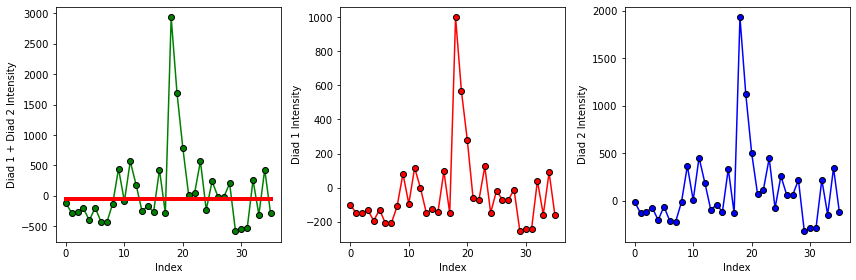

In [10]:
fig, (ax3, ax1, ax2) = plt.subplots(1, 3, figsize=(12,4))

combo_cutoff=-50

ax1.set_xlabel('Index')
ax2.set_xlabel('Index')
ax3.set_xlabel('Index')
ax3.set_ylabel('Diad 1 + Diad 2 Intensity')
ax2.set_ylabel('Diad 2 Intensity')
ax1.set_ylabel('Diad 1 Intensity')

ax1.plot(index_diad, max_diad1,  '-r')
ax1.plot(index_diad, max_diad1,  'ok', mfc='red')

ax2.plot(index_diad, max_diad2,  '-b')
ax2.plot(index_diad, max_diad2,  'ok', mfc='blue')

ax3.plot(index_diad, max_diad2+max_diad1,  '-g')
ax3.plot(index_diad, max_diad2+max_diad1,  'ok', mfc='green')
ax3.plot([np.min(index_diad), np.max(index_diad)],
         [combo_cutoff, combo_cutoff], '-r', lw=4)

## This gets dense diad files
Diad_Files_Dense=list(pd.Series(Diad_files).loc[(max_diad2+max_diad1)>combo_cutoff])
Diad_Files_Weak=list(pd.Series(Diad_files).loc[(max_diad2+max_diad1)<=combo_cutoff])

# ax1.set_yscale('log')
# ax2.set_yscale('log')
# ax3.set_yscale('log')
fig.tight_layout()

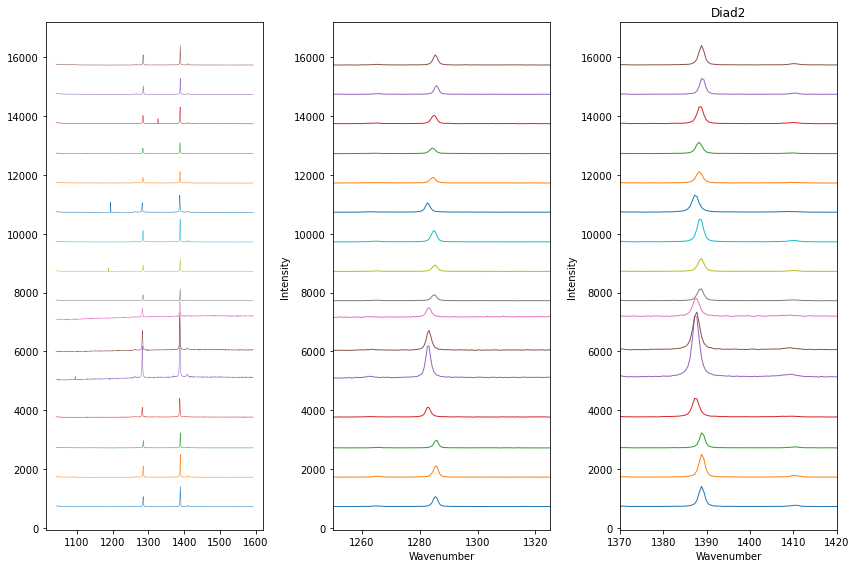

In [11]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12,8))
i=0
lw=1
for file in Diad_Files_Dense:
    Diad=pf.get_data(path=spectra_path, filename=file, filetype=filetype)
    ax0.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=0.5)
    ax1.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=1)
    ax1.set_xlim([1250, 1325])  
    
    ax2.set_title('Diad2')
    ax2.plot(Diad[:, 0],Diad[:, 1]+i, '-', lw=1)
    ax2.set_xlim([1370, 1420])
    i=i+1000
    
#ax0.set_xlabel('Wavenumber')
#ax0.set_ylabel('Intensity')
ax1.set_xlabel('Wavenumber')
ax1.set_ylabel('Intensity')
ax2.set_xlabel('Wavenumber')
ax2.set_ylabel('Intensity')   
fig.tight_layout()

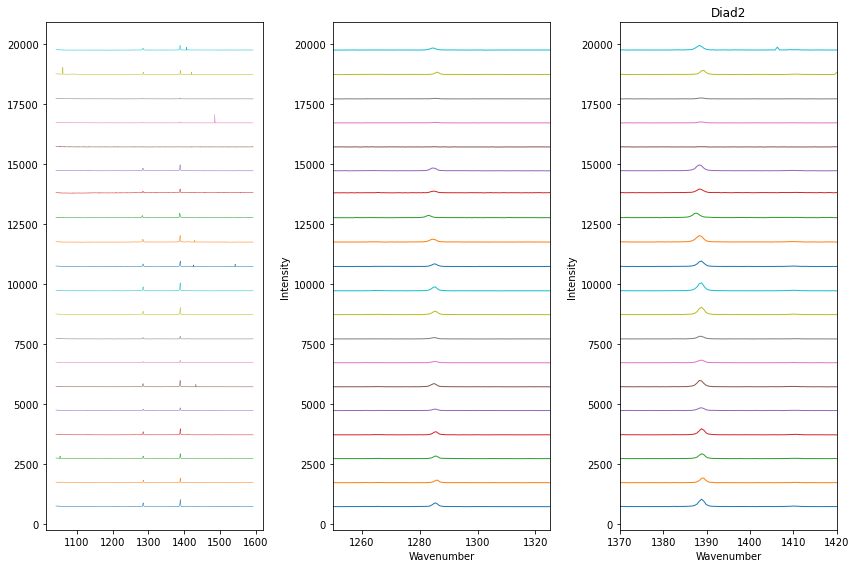

In [12]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12,8))
i=0
lw=1
for file in Diad_Files_Weak:
    Diad=pf.get_data(path=spectra_path, filename=file, filetype=filetype)
    ax0.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=0.5)
    ax1.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=1)
    ax1.set_xlim([1250, 1325])  
    
    ax2.set_title('Diad2')
    ax2.plot(Diad[:, 0],Diad[:, 1]+i, '-', lw=1)
    ax2.set_xlim([1370, 1420])
    i=i+1000
    
#ax0.set_xlabel('Wavenumber')
#ax0.set_ylabel('Intensity')
ax1.set_xlabel('Wavenumber')
ax1.set_ylabel('Intensity')
ax2.set_xlabel('Wavenumber')
ax2.set_ylabel('Intensity')   
fig.tight_layout()

In [13]:
Diad_Files_Dense

['20 LM6 G22 MI2.txt',
 '24 LM6 G24 MI1.txt',
 '26 LM6 G25 MI1.txt',
 '34 LM6 G27 FI4.txt',
 '38 LM6 G27 FI6.txt',
 '40 LM6 G27 FI7.txt',
 '42 LM6 G27 FI8.txt',
 '44 LM6 G28 MI1.txt',
 '46 LM6 G28 MI2.txt',
 '48 LM6 G28 MI3.txt',
 '52 LM6 G28 FI5.txt',
 '54 LM6 G28 MI6.txt',
 '56 LM6 G28 MI7.txt',
 '58 LM6 G28 MI8.txt',
 '66 LM6 G29 MI2.txt',
 '70 LM6 G31 MI1.txt']

## strong Diads first
- This allows you to tweak parameters for your spectra and your instrument

In [24]:
filename=Diad_Files_Dense[8] #'23 MP2_2_MIB_12mW.txt'#  # This finds the first file

# Alternatively, you can specify the actual file name if you want to fit a specific one
#filename='007_k9.csv'
print(filename)

46 LM6 G28 MI2.txt


## First we plot the spectra
- This lets you look at the spectra, decide how strong your hotbands are, and see how elevated the diads are (if they are very elevated, you may need to fit a gaussian background too)

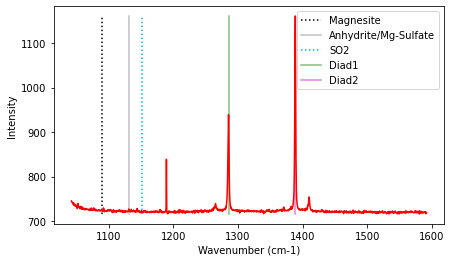

In [25]:
pf.plot_diad(path=spectra_path, filename=filename, filetype=filetype)

## After inspecting the spectra, decide if you want to fit the carbonate peak
- First, look at the presets, you can edit them in carb_peak_config by typing the variable name, and a new value

In [26]:
# Decide if you want to fit a carbonate peak or not here. 
fit_carbonate=False

# Tweak options here, can exclude a range for example using exclude_range=Tuple[float, float]
Carb_Config=pf.carb_peak_config(lower_bck=(1060, 1065), upper_bck=(1120, 1330))
Carb_Config   

carb_peak_config(lower_bck=(1060, 1065), upper_bck=(1120, 1330), N_poly_carb_bck=1, amplitude=1000, cent_carbonate=1090, outlier_sigma=12, N_peaks=3, distance=10, prominence=5, width=6, threshold=0.1, exclude_range=None, dpi=100, plot_figure=True)

## This actually does the work fitting the carbonate peak

In [27]:
Carb_fit=pf.fit_carbonate_peak(config=Carb_Config, path=spectra_path, 
filename=filename, filetype=filetype,
fit_carbonate=fit_carbonate)
Carb_fit

## Now lets plot the diads
- As with carbonate, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

In [28]:
diad_id_config=pf.diad_id_config(height=50)
diad_id_config

diad_id_config(exclude_range1=None, exclude_range2=None, approx_diad2_pos=(1379, 1395), approx_diad1_pos=(1275, 1295), height=50, distance=5, threshold=0.5, width=0.5, prominence=10, plot_figure=True)

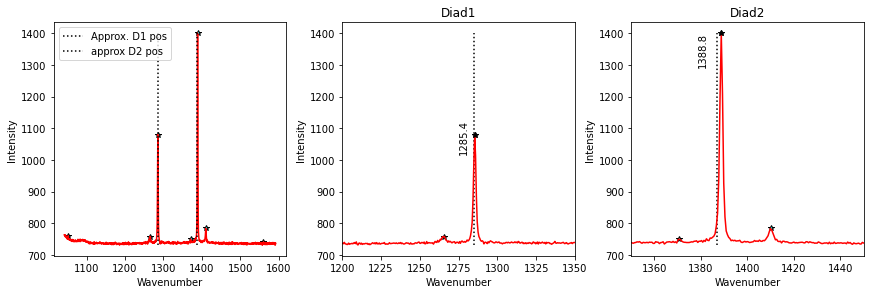

In [41]:
# Specify the number of peaks, 1 = just peak, 2 = Peak+hot bands
n_peaks_diad1=1
n_peaks_diad2=1

    
diad1_peaks, diad2_peaks=pf.identify_diad_peaks(config=diad_id_config, path=spectra_path, filename=filename,
filetype=filetype, n_peaks_diad1=n_peaks_diad1, n_peaks_diad2=n_peaks_diad2)

In [42]:
diad2_peaks

(1388.805794,)

## If you have no diads visible...
- change True to False, and it will just save the carbonate peak parameters

In [43]:
diads_present=True
pf.proceed_to_fit_diads(filename, Carb_fit, diads_present=diads_present)

Move on to fit diads


## Fit Diad 1
- This function uses the guess of the peak parameters above. 
- For very dense diads, you may need to fit a gaussian background, defined by peak_pos_gauss=None, gauss_sigma=1, gauss_amp=3000
- Otherwise, the background is fitted with a polynomial you can set the degree for (Default =1) based on background positoins defined by lower_bck, upper_bck...
- If plot_figure=True, it saves the figure in its own folder in the path, so you can inspect all the fits at a later date. 

In [44]:
diad1_fit_config=pf.diad1_fit_config(peak_pos_gauss=None,
                                     upper_bck_diad1=(1320, 1350),
                                     x_range_residual=10, x_range_baseline=10,
                                    HB_amplitude=50, diad_amplitude=1000)
diad1_fit_config

diad1_fit_config(peak_pos_gauss=None, gauss_sigma=1, gauss_amp=3000, diad_sigma=0.2, N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220), upper_bck_diad1=(1320, 1350), diad_amplitude=1000, HB_amplitude=50, x_range_baseline=10, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=10, return_other_params=False)

,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1
0,1285.380665,865.790589,0.530261,0.530261,2.548635


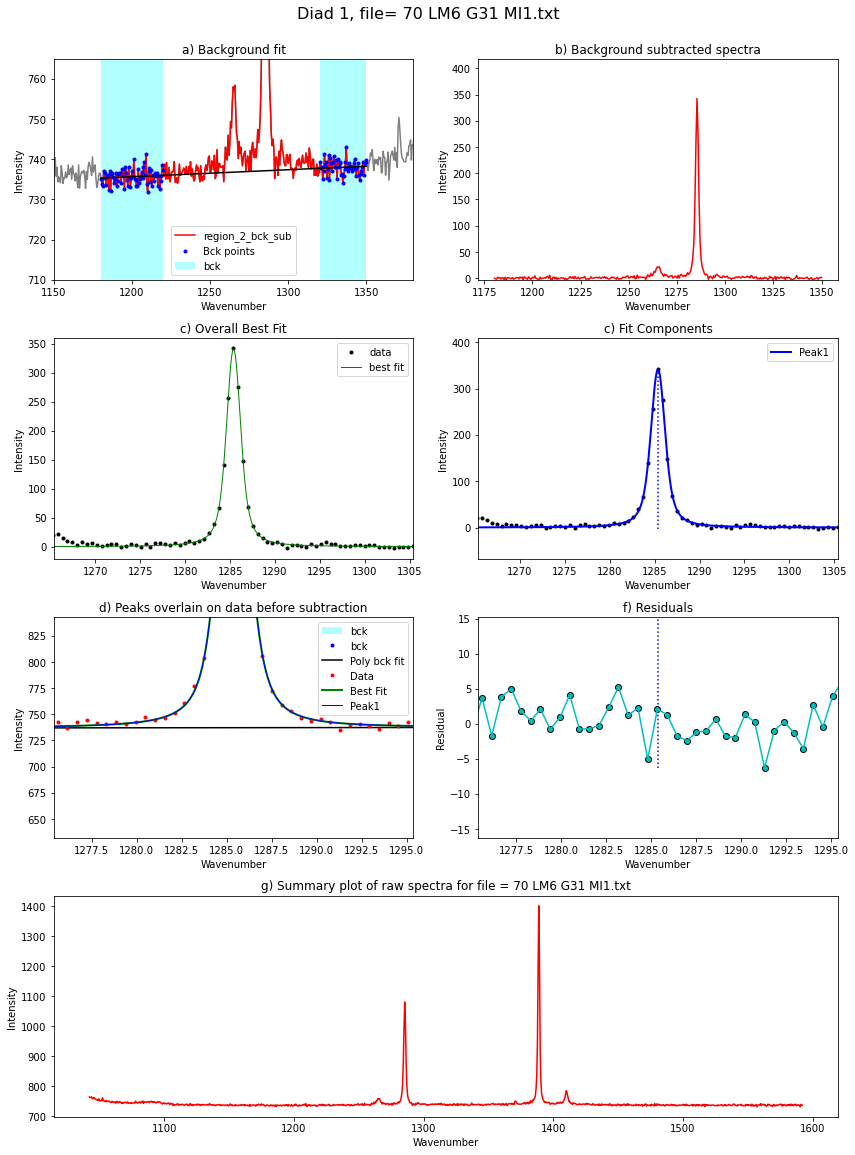

In [45]:
# For very dense spectra, with a very elevated background, you'll need to add a gaussian fit
# If you put a number in brackets, it'll center a gaussian extra background near there. 


# This function does the work fitting the diad
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config,
    config2=diad_id_config, peak_pos_voigt=diad1_peaks,
path=spectra_path, filename=filename, filetype=filetype, close_figure=False)
Diad1_fit

## Fit diad 2

In [46]:
diad2_fit_config=pf.diad2_fit_config(peak_pos_gauss=None,
                                     x_range_residual=10, 
                                     lower_bck_diad2=(1300, 1340),
                                     x_range_baseline=10,
                                     HB_amplitude=100,
                                    diad_amplitude=1000)
diad2_fit_config

diad2_fit_config(peak_pos_gauss=None, gauss_sigma=1, gauss_amp=3000, diad_sigma=0.2, N_poly_bck_diad2=1, lower_bck_diad2=(1300, 1340), upper_bck_diad2=(1440, 1470), diad_amplitude=1000, HB_amplitude=100, x_range_baseline=10, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=10, return_other_params=False)

,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,Residual_Diad2
0,1388.806211,1349.961767,0.426254,0.426254,3.897071


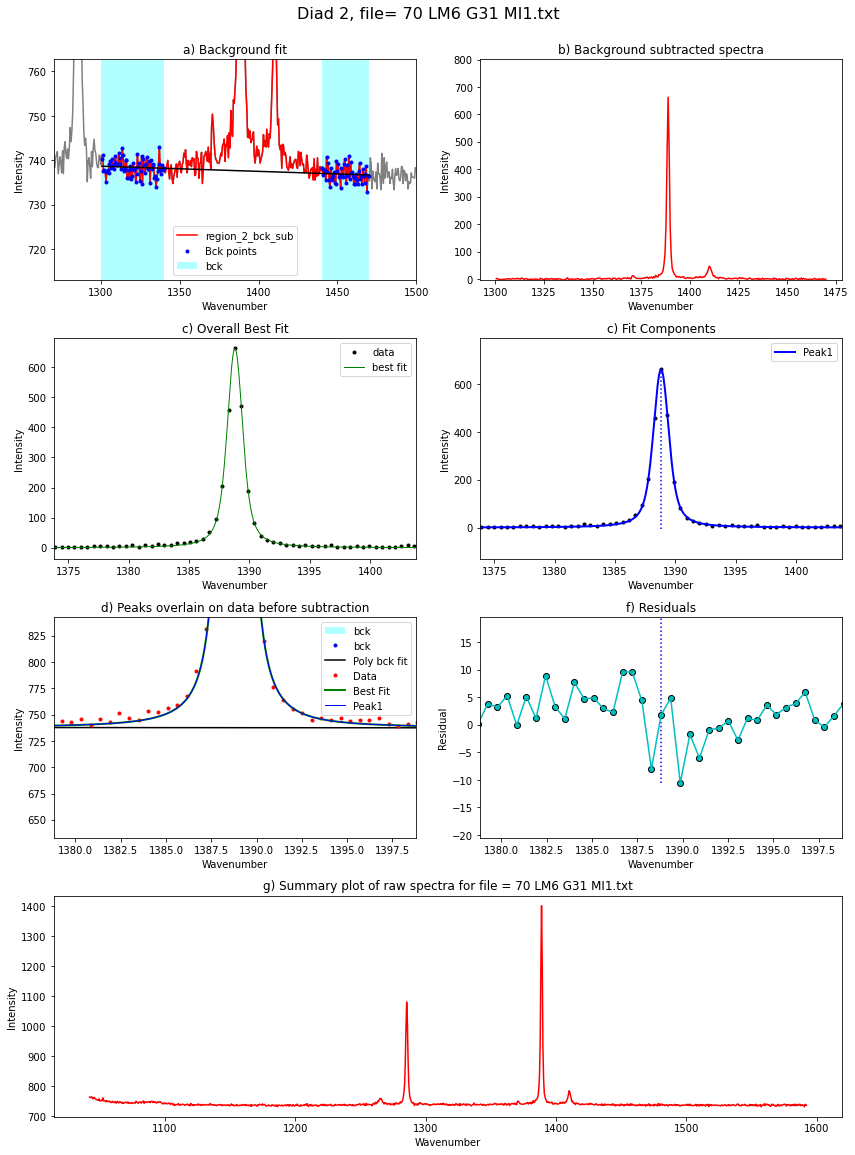

In [47]:
# Do you want to save the figure?
# This function does the work fitting the diad
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config,
    config2=diad_id_config, peak_pos_voigt=diad2_peaks,
path=spectra_path, filename=filename, filetype=filetype, close_figure=False)
Diad2_fit

## Combine and save
- Saves to clipboard if to_clipboard=True (e.g. you can paste into a spreadsheet)
- Also saves to 'csv' in a folder in "spectra_path" if to_csv=True)
- It also makes a new 

In [48]:
out=pf.combine_diad_outputs(filename=filename, prefix=prefix, 
Diad1_fit=Diad1_fit, to_clipboard=True, to_csv=True, path=spectra_path,
Diad2_fit=Diad2_fit, Carb_fit=Carb_fit)
out

,filename,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area
0,70 LM6 G31 MI1,103.425546,1285.380665,865.790589,0.530261,0.530261,2.548635,1388.806211,1349.961767,0.426254,0.426254,3.897071,NaN,0,NaN,0,NaN,0


In [49]:
out

,filename,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area
0,70 LM6 G31 MI1,103.425546,1285.380665,865.790589,0.530261,0.530261,2.548635,1388.806211,1349.961767,0.426254,0.426254,3.897071,NaN,0,NaN,0,NaN,0


## You can also try looping if all your spectra are pretty similar

In [51]:
from tqdm import tqdm
plot_figure=True # Means doesnt have to make figures, lot faster. 
to_clipboard=False # Copies to clipboard
Diad_Files_Dense_i=Diad_Files_Dense
df_Dense = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files_Dense))):
    
    filename=Diad_Files_Dense[i]

    
    diad1_peaks, diad2_peaks=pf.identify_diad_peaks(config=diad_id_config,
            path=spectra_path, filename=filename,
filetype=filetype, n_peaks_diad1=n_peaks_diad1, 
    n_peaks_diad2=n_peaks_diad2, plot_figure=False)

    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config,
        config2=diad_id_config, peak_pos_voigt=diad2_peaks,
    path=spectra_path, filename=filename, filetype=filetype)
    
    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config,
    config2=diad_id_config, peak_pos_voigt=diad1_peaks,
path=spectra_path, filename=filename, filetype=filetype)
    
    data=pf.combine_diad_outputs(filename=filename, prefix=prefix, 
Diad1_fit=Diad1_fit, path=spectra_path,
 to_clipboard=to_clipboard,
                                
Diad2_fit=Diad2_fit)
 

    df_Dense = pd.concat([df_Dense, data], axis=0)


100%|███████████████████████████████████████████| 16/16 [00:19<00:00,  1.24s/it]


In [52]:
df_Dense

,filename,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area
0,20 LM6 G22 MI2,103.401400,1285.418913,898.483711,0.546850,0.546850,2.300596,1388.820313,1436.771887,0.436004,0.436004,3.591458,NaN,0,NaN,0,NaN,0
0,24 LM6 G24 MI1,103.321662,1285.562733,1046.496511,0.561611,0.561611,3.131847,1388.884395,1633.381252,0.434217,0.434217,4.474971,NaN,0,NaN,0,NaN,0
0,26 LM6 G25 MI1,103.281562,1285.662636,635.796853,0.501853,0.501853,2.048352,1388.944198,1006.501418,0.399036,0.399036,2.658636,NaN,0,NaN,0,NaN,0
0,34 LM6 G27 FI4,104.550606,1282.906770,958.563804,0.586500,0.586500,3.798168,1387.457376,1678.301130,0.534600,0.534600,5.179772,NaN,0,NaN,0,NaN,0
0,38 LM6 G27 FI6,104.549042,1282.927027,3111.437501,0.583729,0.583729,10.101614,1387.476069,5522.137786,0.534594,0.534594,16.054078,NaN,0,NaN,0,NaN,0
0,40 LM6 G27 FI7,104.458443,1283.138353,1873.479125,0.590776,0.590776,7.094452,1387.596796,3315.045761,0.536292,0.536292,10.496368,NaN,0,NaN,0,NaN,0
0,42 LM6 G27 FI8,104.431472,1283.122817,901.811572,0.589725,0.589725,5.684746,1387.554289,1585.723372,0.535182,0.535182,6.488759,NaN,0,NaN,0,NaN,0
0,44 LM6 G28 MI1,103.596239,1284.957360,581.136624,0.596740,0.596740,1.903951,1388.553599,924.372984,0.458776,0.458776,2.706028,NaN,0,NaN,0,NaN,0
0,46 LM6 G28 MI2,103.473401,1285.210891,608.411396,0.586730,0.586730,2.248819,1388.684292,961.415012,0.457127,0.457127,3.019049,NaN,0,NaN,0,NaN,0
0,48 LM6 G28 MI3,103.612313,1284.883022,1139.864659,0.615250,0.615250,2.983252,1388.495334,1824.439204,0.467090,0.467090,4.426974,NaN,0,NaN,0,NaN,0


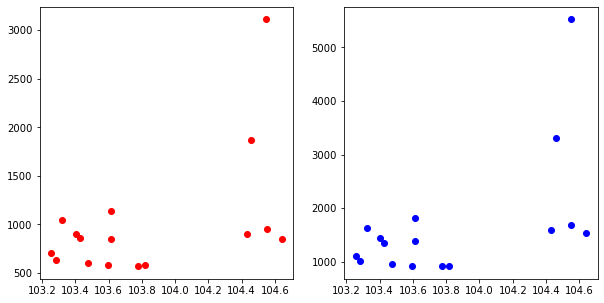

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Dense['Splitting'], df_Dense['Diad1_Area'], 'or')
ax2.plot(df_Dense['Splitting'], df_Dense['Diad2_Area'], 'ob')

df_not_too_Dense=df_Dense.loc[(df_Dense['Diad1_Area']>25) & (df_Dense['Diad2_Area']>30)]

## Extracting metadata for these diads

In [77]:
# Put the common string you can in all your Ne lines here
ID_str='.txt'
file_ext_meta='txt' # Will only take files of this type 
exclude_str='Ne' # Will exclude files of this type, sometimes images have same name
prefix=True # Leave as none unless witec appended a number
diad_meta=pf.get_Ne_files(path=meta_path, file_ext=file_ext_meta, ID_str=ID_str, 
                         exclude_str=exclude_str, sort=True)

diad_meta[0:5]


['LM6 G15 MI1 PHOTO.txt',
 'LM6 G15 MI1.txt',
 'LM6 G15 MI2 PHOTO.txt',
 'LM6 G15 MI2.txt',
 'LM6 G17 MI1 PHOTO.txt']

In [78]:
meta=pf.stitch_metadata_in_loop(path=meta_path, Allfiles=diad_meta, prefix=False,
                               trupower=True)

100%|███████████████████████████████████████| 107/107 [00:00<00:00, 2255.67it/s]

Done



/Users/kyledayton/opt/anaconda3/lib/python3.9/site-packages/DiadFit/importing_data_files.py:594: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Time_Df_2['index']=Time_Df_2.index


In [79]:
meta['filename']

70            NE 1.txt
1      LM6 G15 MI1.txt
81            NE 2.txt
3      LM6 G15 MI2.txt
92            NE 3.txt
            ...       
98           NE 35.txt
67     LM6 G31 MI1.txt
99           NE 36.txt
69     LM6 G31 MI2.txt
100          NE 37.txt
Name: filename, Length: 72, dtype: object

## Stitching metadata and data together

In [80]:
meta['filename'][3]

'LM6 G15 MI2.txt'

In [81]:
df_not_too_Dense['filename'][0]

0    20 LM6 G22 MI2
0    24 LM6 G24 MI1
0    26 LM6 G25 MI1
0    34 LM6 G27 FI4
0    38 LM6 G27 FI6
0    40 LM6 G27 FI7
0    42 LM6 G27 FI8
0    44 LM6 G28 MI1
0    46 LM6 G28 MI2
0    48 LM6 G28 MI3
0    52 LM6 G28 FI5
0    54 LM6 G28 MI6
0    56 LM6 G28 MI7
0    58 LM6 G28 MI8
0    66 LM6 G29 MI2
0    70 LM6 G31 MI1
Name: filename, dtype: object

In [89]:
# remove these to get the pure file name you can compare 
file_m=pf.extracting_filenames_generic(names=meta['filename'],
    prefix=False, str_prefix=' ',
   file_type='.txt')

file_m

array(['NE 1', 'LM6 G15 MI1', 'NE 2', 'LM6 G15 MI2', 'NE 3',
       'LM6 G17 MI1', 'NE 4', 'LM6 G17 MI2', 'NE 5', 'LM6 G19 MI1',
       'NE 6', 'LM6 G20 MI1', 'NE 7', 'LM6 G21 MI1', 'NE 8',
       'LM6 G21 MI2', 'NE 9', 'LM6 G22 MI1', 'NE 10', 'LM6 G22 MI2',
       'NE 11', 'LM6 G23 MI1', 'NE 12', 'LM6 G24 MI1', 'NE 13',
       'LM6 G25 MI1', 'NE 14', 'LM6 G27 MI1', 'NE 15', 'LM6 G27 MI2',
       'NE 16', 'LM6 G27 FI3', 'NE 17', 'LM6 G27 FI4', 'NE 18',
       'LM6 G27 MI5', 'NE 19', 'LM6 G27 FI6', 'NE 20', 'LM6 G27 FI7',
       'NE 21', 'LM6 G27 FI8', 'NE 22', 'LM6 G28 MI1', 'NE 23',
       'LM6 G28 MI2', 'NE 24', 'LM6 G28 MI3', 'NE 25', 'LM6 G28 MI4',
       'NE 26', 'LM6 G28 FI5', 'NE 27', 'LM6 G28 MI6', 'NE 28',
       'LM6 G28 MI7', 'NE 29', 'LM6 G28 MI8', 'NE 30',
       'LM6 G29 MI1 NO CO2', 'NE 31', 'NE 32', 'LM6 G30 MI1', 'NE 33',
       'LM6 G29 MI2', 'NE 34', 'LM6 G29 MI3', 'NE 35', 'LM6 G31 MI1',
       'NE 36', 'LM6 G31 MI2', 'NE 37'], dtype=object)

In [90]:
df_not_too_Dense['filename'].head()

0    20 LM6 G22 MI2
0    24 LM6 G24 MI1
0    26 LM6 G25 MI1
0    34 LM6 G27 FI4
0    38 LM6 G27 FI6
Name: filename, dtype: object

In [91]:
type(df_not_too_Dense['filename'])

pandas.core.series.Series

In [92]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(names=df_not_too_Dense['filename'].reset_index(drop=True),
    prefix=True, str_prefix=' ',
   file_type='.txt')
file_s

array(['LM6 G22 MI2', 'LM6 G24 MI1', 'LM6 G25 MI1', 'LM6 G27 FI4',
       'LM6 G27 FI6', 'LM6 G27 FI7', 'LM6 G27 FI8', 'LM6 G28 MI1',
       'LM6 G28 MI2', 'LM6 G28 MI3', 'LM6 G28 FI5', 'LM6 G28 MI6',
       'LM6 G28 MI7', 'LM6 G28 MI8', 'LM6 G29 MI2', 'LM6 G31 MI1'],
      dtype=object)

In [93]:
# Combining them together
meta['name_for_matching']=file_m
df_not_too_Dense['name_for_matching']=file_s
df_combo=df_not_too_Dense.merge(meta, on='name_for_matching')

In [94]:
df_combo.head()

,filename_x,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,...,date,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,index
0,20 LM6 G22 MI2,103.401400,1285.418913,898.483711,0.546850,0.546850,2.300596,1388.820313,1436.771887,0.436004,...,"September 16, 2022\n",5.041,45.0,5.0,50.0,"['0h', '3m', '47s']",11:35:51 AM\n,41751.0,1324.929,19
1,24 LM6 G24 MI1,103.321662,1285.562733,1046.496511,0.561611,0.561611,3.131847,1388.884395,1633.381252,0.434217,...,"September 16, 2022\n",5.042,45.0,5.0,100.0,"['0h', '3m', '47s']",11:54:49 AM\n,42889.0,1324.929,23
2,26 LM6 G25 MI1,103.281562,1285.662636,635.796853,0.501853,0.501853,2.048352,1388.944198,1006.501418,0.399036,...,"September 16, 2022\n",5.043,45.0,5.0,100.0,"['0h', '3m', '47s']",12:11:42 PM\n,43902.0,1324.929,25
3,34 LM6 G27 FI4,104.550606,1282.906770,958.563804,0.586500,0.586500,3.798168,1387.457376,1678.301130,0.534600,...,"September 16, 2022\n",5.043,45.0,5.0,100.0,"['0h', '3m', '47s']",12:43:07 PM\n,45787.0,1324.929,29
4,38 LM6 G27 FI6,104.549042,1282.927027,3111.437501,0.583729,0.583729,10.101614,1387.476069,5522.137786,0.534594,...,"September 16, 2022\n",5.047,45.0,5.0,50.0,"['0h', '3m', '47s']",12:57:53 PM\n,46673.0,1324.929,31


## Now load in the model for doing the Ne fitting

In [97]:
from pickle import load
import pickle
import os
pickle_path=os.getcwd()
file_pkl=pickle_path + '/' + 'Ne_Line_Regression_09.16.22.pck'
with open(file_pkl, 'rb') as file_handle:
    my_loaded_model = pickle.load(file_handle)

In [98]:
df_combo['Ne_Correction']=my_loaded_model(df_combo['sec since midnight'])
df_combo.insert(1,'Corrected_Splitting', df_combo['Ne_Correction']*df_combo['Splitting'])

In [99]:
density_df=pf.calculate_density_cornell(temp='SupCrit', Split=df_combo['Corrected_Splitting'])
df_combo.insert(1, 'Density', density_df['Preferred D'])

In [100]:
df_FIs=df_combo.loc[df_combo['filename_x'].str.contains('FI')]

In [107]:
df_FIs

,filename_x,Density,Corrected_Splitting,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,...,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,index,Ne_Correction
3,34 LM6 G27 FI4,0.836018,104.637331,104.550606,1282.906770,958.563804,0.586500,0.586500,3.798168,1387.457376,...,5.043,45.0,5.0,100.0,"['0h', '3m', '47s']",12:43:07 PM\n,45787.0,1324.929,29,1.000830
4,38 LM6 G27 FI6,0.835248,104.635373,104.549042,1282.927027,3111.437501,0.583729,0.583729,10.101614,1387.476069,...,5.047,45.0,5.0,50.0,"['0h', '3m', '47s']",12:57:53 PM\n,46673.0,1324.929,31,1.000826
5,40 LM6 G27 FI7,0.798244,104.544493,104.458443,1283.138353,1873.479125,0.590776,0.590776,7.094452,1387.596796,...,5.055,45.0,5.0,50.0,"['0h', '3m', '47s']",1:06:18 PM\n,47178.0,1324.929,33,1.000824
6,42 LM6 G27 FI8,0.786707,104.517352,104.431472,1283.122817,901.811572,0.589725,0.589725,5.684746,1387.554289,...,5.045,45.0,5.0,50.0,"['0h', '3m', '47s']",1:12:59 PM\n,47579.0,1324.929,35,1.000822
10,52 LM6 G28 FI5,0.869970,104.726851,104.641241,1282.743476,848.281996,0.570063,0.570063,3.085861,1387.384716,...,5.047,45.0,5.0,100.0,"['0h', '3m', '47s']",1:52:20 PM\n,49940.0,1324.929,43,1.000818


In [108]:
df_MIs=df_combo.loc[df_combo['filename_x'].str.contains('MI')]

In [109]:
df_MIs

,filename_x,Density,Corrected_Splitting,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,...,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,index,Ne_Correction
0,20 LM6 G22 MI2,0.305020,103.488599,103.401400,1285.418913,898.483711,0.546850,0.546850,2.300596,1388.820313,...,5.041,45.0,5.0,50.0,"['0h', '3m', '47s']",11:35:51 AM\n,41751.0,1324.929,19,1.000843
1,24 LM6 G24 MI1,0.270298,103.408547,103.321662,1285.562733,1046.496511,0.561611,0.561611,3.131847,1388.884395,...,5.042,45.0,5.0,100.0,"['0h', '3m', '47s']",11:54:49 AM\n,42889.0,1324.929,23,1.000841
2,26 LM6 G25 MI1,0.253005,103.368059,103.281562,1285.662636,635.796853,0.501853,0.501853,2.048352,1388.944198,...,5.043,45.0,5.0,100.0,"['0h', '3m', '47s']",12:11:42 PM\n,43902.0,1324.929,25,1.000837
7,44 LM6 G28 MI1,0.391170,103.681278,103.596239,1284.957360,581.136624,0.596740,0.596740,1.903951,1388.553599,...,5.042,45.0,5.0,50.0,"['0h', '3m', '47s']",1:20:56 PM\n,48056.0,1324.929,45,1.000821
8,46 LM6 G28 MI2,0.335752,103.558219,103.473401,1285.210891,608.411396,0.586730,0.586730,2.248819,1388.684292,...,5.023,45.0,5.0,100.0,"['0h', '3m', '47s']",1:28:32 PM\n,48512.0,1324.929,47,1.000820
9,48 LM6 G28 MI3,0.398412,103.697151,103.612313,1284.883022,1139.864659,0.615250,0.615250,2.983252,1388.495334,...,5.041,45.0,5.0,100.0,"['0h', '3m', '47s']",1:36:17 PM\n,48977.0,1324.929,49,1.000819
11,54 LM6 G28 MI6,0.473832,103.860126,103.775194,1284.515774,568.154721,0.622242,0.622242,2.059459,1388.290968,...,5.049,45.0,5.0,100.0,"['0h', '3m', '47s']",1:59:25 PM\n,50365.0,1324.929,53,1.000818
12,56 LM6 G28 MI7,0.493173,103.901328,103.816286,1284.417589,580.710395,0.653121,0.653121,1.831352,1388.233875,...,5.050,45.0,5.0,100.0,"['0h', '3m', '47s']",2:06:56 PM\n,50816.0,1324.929,55,1.000819
13,58 LM6 G28 MI8,0.398761,103.697917,103.612893,1284.898815,850.407089,0.615682,0.615682,2.410433,1388.511709,...,5.053,45.0,5.0,50.0,"['0h', '3m', '47s']",2:15:19 PM\n,51319.0,1324.929,57,1.000821
14,66 LM6 G29 MI2,0.242099,103.342296,103.255365,1285.752034,702.202467,0.493391,0.493391,2.289980,1389.007399,...,5.061,45.0,5.0,50.0,"['0h', '3m', '47s']",3:01:03 PM\n,54063.0,1325.000,61,1.000842


In [110]:
FIs_AL=pf.convert_co2_density_depth_Coolprop(T_K=1200+273.15,
    CO2_dens_gcm3=df_FIs['Density'].reset_index(drop=True),
    crust_dens_kgm3='ryan_lerner',
    g=9.81, output='df')

FIs_27=pf.convert_co2_density_depth_Coolprop(T_K=1200+273.15,
    CO2_dens_gcm3=df_FIs['Density'].reset_index(drop=True),
    crust_dens_kgm3=2500,
    g=9.81, output='df')

(array([1., 1., 0., 0., 0., 2., 0., 0., 0., 1.]),
 array([20.27170144, 20.7549789 , 21.23825636, 21.72153382, 22.20481129,
        22.68808875, 23.17136621, 23.65464367, 24.13792113, 24.6211986 ,
        25.10447606]),
 <BarContainer object of 10 artists>)

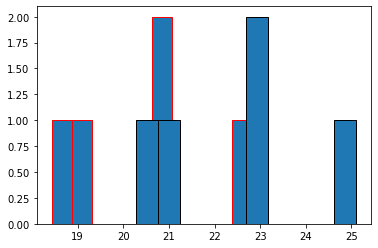

In [111]:
plt.hist(FIs_AL['Depth (km)'], ec='r')
plt.hist(FIs_27['Depth (km)'], ec='k', fc=None)

Text(0.5, 0, 'Density')

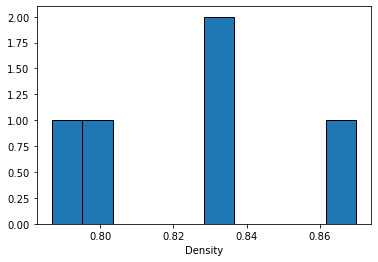

In [112]:
plt.hist(df_FIs['Density'], ec='k')
plt.xlabel('Density')

In [113]:
df_MIs.to_excel('LM6_highrho__091622_MIs.xlsx')

In [114]:
df_FIs.to_excel('LM6_highrho_091622_FIs.xlsx')